In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import subprocess
!pip install shap
!pip install --upgrade shap

try:
    import japanize_matplotlib
    print("japanize_matplotlib is already installed.")
except ImportError:
    !pip install japanize_matplotlib
    print("japanize_matplotlib has been installed.")

try:
    import catboost
    print("catboost is already installed.")
except ImportError:
    !pip install catboost
    print("catboost has been installed.")

try:
    import optuna
    print("optuna is already installed.")
except ImportError:
    !pip install optuna
    print("optuna has been installed.")

try:
    import geolib
    print("geolib is already installed.")
except ImportError:
    !pip install geolib
    print("geolib has been installed.")

# mkdirとechoコマンドの実行
try:
    subprocess.check_call('mkdir -p /etc/OpenCL/vendors && echo "libnvidia-opencl.so.1" > /etc/OpenCL/vendors/nvidia.icd', shell=True)
    print('Directory and file for OpenCL vendors have been created.')
except subprocess.CalledProcessError as e:
    print(f"Error running mkdir and echo command: {e}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=881c8b02a3f71828de9805b40068410d577a83e380d9f47734d0c15199a2092c
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib
japanize_matplotlib has been installed.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 23.1 MB/s eta 0:00:00
catboost has been installed.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.3 MB/s eta 0:00:00
optuna has been installed.
geolib has been installed.
Directory and file for OpenCL ven

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import joblib

import sys
sys.path.append('/content/drive/MyDrive/yuto/project_directory/code')

from utils import (ProcessData,
                   trans_chara,
                   fill_missing_values,
                   fill_missing_with_mode,
                   find_nearest_station_main_table,
                   calculate_distance,
                   convert_kanji_to_fullwidth_2,
                   encode_geohash,
                   to_cat_col,
                   TreeExecution,
                   VotingModel,
                   submisson_datetime,
                   check_dataframe_elements
                   )

TOTAL_PRICE_LOG="取引価格（総額）_log"
PRICE_PER_AREA_LOG="単位面積あたりの取引価格_log"

#TARGET="取引価格（総額）_log"

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
df=pd.read_csv("/content/drive/MyDrive/yuto/project_directory/data/intermediate_results/checkpoints/preprocess_main_table.csv",index_col=0)
df=df[['dataset', 'ID', '価格情報区分', '都道府県名', '市区町村名', '地区名', '住所不一致_Flag', '住所',
       '最寄駅：名称', '最寄駅：距離（分）', '徒歩時間_10分単位', 'x_api', 'y_api', 'lon', 'lat',
       '間取り', '面積（㎡）', '建築年', '建物の構造', '用途', '今後の利用目的', '都市計画', '建ぺい率（％）',
       '容積率（％）', '取引時点', '改装', '取引の事情等', '単位面積あたりの取引価格_log', '建築西暦年', '築年数',
       'log_面積（㎡）', '購入までの築年数', '面積（㎡）-最寄駅：距離（分）', '面積（㎡）-築年数',
       '面積（㎡）容積率（％）_combi', '旧耐震フラグ', '最寄駅までの距離', 'geohash_2', 'geohash_3',
       'geohash_4', 'geohash_5', 'geohash_6', 'geohash_7', '県_市_count',
       '建築年_count', '県_市_geohash_2_駅数', '県_市_geohash_3_駅数', '県_市_geohash_4_駅数',
       '県_市_geohash_5_駅数', '県_市_geohash_6_駅数', '県_市_geohash_7_駅数',
       '県_市_geohash_2_駅徒歩時間平均', '県_市_geohash_2_建築年平均', '県_市_geohash_3_駅徒歩時間平均',
       '県_市_geohash_3_建築年平均', '県_市_geohash_4_駅徒歩時間平均', '県_市_geohash_4_建築年平均',
       '県_市_geohash_5_駅徒歩時間平均', '県_市_geohash_5_建築年平均', '県_市_geohash_6_駅徒歩時間平均',
       '県_市_geohash_6_建築年平均', '県_市_geohash_7_駅徒歩時間平均', '県_市_geohash_7_建築年平均']]


In [5]:
# データフレームを分割
df_train = df[df['dataset'] == 'train'].set_index('ID')
df_test = df[df['dataset'] == 'test'].set_index('ID')

# datasetカラムを削除
df_train = df_train.drop(columns=['dataset'])
df_test = df_test.drop(columns=['dataset'])

df_train,cat_cols=to_cat_col(df_train)

# インデックスを読み込み
train_index = np.load('/content/drive/MyDrive/yuto/project_directory/data/intermediate_results/checkpoints/train_index_cat_lq_cv.npy')
test_index = np.load('/content/drive/MyDrive/yuto/project_directory/data/intermediate_results/checkpoints/test_index_cat_lq_cv.npy')
print(train_index)
print(test_index)
# インデックスを設定して順序を再現
df_train = df_train.loc[train_index]
df_test = df_test.loc[test_index]

print("Train DataFrame:")
print(df_train)
print("\nTest DataFrame:")
print(df_test)

[ 1046933  1079053  1170588 ... 47003811 47010902 47011639]
[ 1000107  1000109  1000112 ... 47037850 47037855 47037856]
Train DataFrame:
             価格情報区分 都道府県名   市区町村名    地区名  住所不一致_Flag              住所 最寄駅：名称  \
ID                                                                            
1046933   不動産取引価格情報   北海道  札幌市白石区    南郷通           0    北海道札幌市白石区南郷通  南郷７丁目   
1079053   不動産取引価格情報   北海道   札幌市西区  発寒１２条           0   北海道札幌市西区発寒１２条   発寒中央   
1170588      成約価格情報   北海道     江別市   大麻北町           0      北海道江別市大麻北町   森林公園   
1001637      成約価格情報   北海道  札幌市中央区   北５条西           0   北海道札幌市中央区北５条西  西２８丁目   
1014790   不動産取引価格情報   北海道  札幌市中央区  宮の森２条           0  北海道札幌市中央区宮の森２条  西２８丁目   
...             ...   ...     ...    ...         ...             ...    ...   
47001427  不動産取引価格情報   沖縄県     那覇市  首里山川町           0     沖縄県那覇市首里山川町     儀保   
47035975     成約価格情報   沖縄県  中頭郡北谷町     美浜           0     沖縄県中頭郡北谷町美浜  てだこ浦西   
47003811  不動産取引価格情報   沖縄県     那覇市    古波蔵           0       沖縄県那覇市古波蔵     

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 5.4153403	test: 5.4150457	best: 5.4150457 (0)	total: 218ms	remaining: 59m 23s
500:	learn: 0.0833749	test: 0.0835642	best: 0.0835642 (500)	total: 1m 36s	remaining: 50m 35s
1000:	learn: 0.0755044	test: 0.0769430	best: 0.0769430 (1000)	total: 3m 30s	remaining: 53m 36s
1500:	learn: 0.0712191	test: 0.0737366	best: 0.0737366 (1500)	total: 5m 26s	remaining: 53m 44s
2000:	learn: 0.0684801	test: 0.0719785	best: 0.0719785 (2000)	total: 7m 21s	remaining: 52m 38s
2500:	learn: 0.0665344	test: 0.0708999	best: 0.0708999 (2500)	total: 9m 17s	remaining: 51m 20s
3000:	learn: 0.0648138	test: 0.0700725	best: 0.0700725 (3000)	total: 11m 13s	remaining: 49m 50s
3500:	learn: 0.0632053	test: 0.0693997	best: 0.0693997 (3500)	total: 13m 11s	remaining: 48m 18s
4000:	learn: 0.0619274	test: 0.0689086	best: 0.0689086 (4000)	total: 15m 7s	remaining: 46m 34s
4500:	learn: 0.0608616	test: 0.0685423	best: 0.0685423 (4500)	total: 17m 2s	remaining: 44m 46s
5000:	learn: 0.0598909	test: 0.0682362	best: 0.0682362 (5

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 5.4151234	test: 5.4143269	best: 5.4143269 (0)	total: 117ms	remaining: 31m 56s
500:	learn: 0.0833333	test: 0.0837524	best: 0.0837524 (500)	total: 1m 36s	remaining: 50m 40s
1000:	learn: 0.0755627	test: 0.0770319	best: 0.0770319 (1000)	total: 3m 29s	remaining: 53m 27s
1500:	learn: 0.0715178	test: 0.0739252	best: 0.0739252 (1500)	total: 5m 26s	remaining: 53m 46s
2000:	learn: 0.0686360	test: 0.0720249	best: 0.0720249 (2000)	total: 7m 21s	remaining: 52m 41s
2500:	learn: 0.0663445	test: 0.0707650	best: 0.0707650 (2500)	total: 9m 17s	remaining: 51m 21s
3000:	learn: 0.0645588	test: 0.0699130	best: 0.0699130 (3000)	total: 11m 13s	remaining: 49m 48s
3500:	learn: 0.0630655	test: 0.0693103	best: 0.0693103 (3500)	total: 13m 9s	remaining: 48m 10s
4000:	learn: 0.0617858	test: 0.0688594	best: 0.0688594 (4000)	total: 15m 5s	remaining: 46m 28s
4500:	learn: 0.0605374	test: 0.0684657	best: 0.0684657 (4500)	total: 17m 2s	remaining: 44m 46s
5000:	learn: 0.0594942	test: 0.0681449	best: 0.0681449 (50

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 5.4150023	test: 5.4148148	best: 5.4148148 (0)	total: 208ms	remaining: 56m 41s
500:	learn: 0.0832590	test: 0.0840096	best: 0.0840096 (500)	total: 1m 37s	remaining: 51m 10s
1000:	learn: 0.0753223	test: 0.0772547	best: 0.0772547 (1000)	total: 3m 30s	remaining: 53m 45s
1500:	learn: 0.0713794	test: 0.0742531	best: 0.0742531 (1500)	total: 5m 26s	remaining: 53m 40s
2000:	learn: 0.0684615	test: 0.0723832	best: 0.0723832 (2000)	total: 7m 21s	remaining: 52m 36s
2500:	learn: 0.0662564	test: 0.0711847	best: 0.0711847 (2500)	total: 9m 16s	remaining: 51m 14s
3000:	learn: 0.0644992	test: 0.0703525	best: 0.0703525 (3000)	total: 11m 12s	remaining: 49m 45s
3500:	learn: 0.0630387	test: 0.0697517	best: 0.0697517 (3500)	total: 13m 9s	remaining: 48m 9s
4000:	learn: 0.0617376	test: 0.0692891	best: 0.0692891 (4000)	total: 15m 5s	remaining: 46m 28s
4500:	learn: 0.0605327	test: 0.0689113	best: 0.0689113 (4500)	total: 17m 1s	remaining: 44m 43s
5000:	learn: 0.0594617	test: 0.0686127	best: 0.0686127 (500

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 5.4152916	test: 5.4154212	best: 5.4154212 (0)	total: 215ms	remaining: 58m 23s
500:	learn: 0.0833169	test: 0.0838689	best: 0.0838689 (500)	total: 1m 38s	remaining: 51m 35s
1000:	learn: 0.0754477	test: 0.0770359	best: 0.0770359 (1000)	total: 3m 32s	remaining: 54m 5s
1500:	learn: 0.0713114	test: 0.0738993	best: 0.0738993 (1500)	total: 5m 28s	remaining: 54m 6s
2000:	learn: 0.0684774	test: 0.0720401	best: 0.0720401 (2000)	total: 7m 23s	remaining: 52m 57s
2500:	learn: 0.0663948	test: 0.0708848	best: 0.0708848 (2500)	total: 9m 19s	remaining: 51m 30s
3000:	learn: 0.0648147	test: 0.0701067	best: 0.0701067 (3000)	total: 11m 14s	remaining: 49m 52s
3500:	learn: 0.0634705	test: 0.0695264	best: 0.0695264 (3500)	total: 13m 10s	remaining: 48m 13s
4000:	learn: 0.0620950	test: 0.0690125	best: 0.0690125 (4000)	total: 15m 6s	remaining: 46m 32s
4500:	learn: 0.0608409	test: 0.0686258	best: 0.0686258 (4500)	total: 17m 3s	remaining: 44m 46s
5000:	learn: 0.0596141	test: 0.0682978	best: 0.0682978 (500

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 5.4150232	test: 5.4156977	best: 5.4156977 (0)	total: 212ms	remaining: 57m 32s
500:	learn: 0.0832353	test: 0.0837001	best: 0.0837001 (500)	total: 1m 36s	remaining: 50m 54s
1000:	learn: 0.0753678	test: 0.0770489	best: 0.0770489 (1000)	total: 3m 30s	remaining: 53m 46s
1500:	learn: 0.0712522	test: 0.0740017	best: 0.0740017 (1500)	total: 5m 27s	remaining: 53m 48s
2000:	learn: 0.0683353	test: 0.0721990	best: 0.0721990 (2000)	total: 7m 22s	remaining: 52m 44s
2500:	learn: 0.0660848	test: 0.0709829	best: 0.0709829 (2500)	total: 9m 18s	remaining: 51m 24s
3000:	learn: 0.0643273	test: 0.0701757	best: 0.0701757 (3000)	total: 11m 15s	remaining: 49m 58s
3500:	learn: 0.0629393	test: 0.0696248	best: 0.0696248 (3500)	total: 13m 12s	remaining: 48m 20s
4000:	learn: 0.0616801	test: 0.0691698	best: 0.0691698 (4000)	total: 15m 9s	remaining: 46m 39s
4500:	learn: 0.0605424	test: 0.0688094	best: 0.0688094 (4500)	total: 17m 6s	remaining: 44m 54s
5000:	learn: 0.0594711	test: 0.0685102	best: 0.0685102 (5

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 5.4149666	test: 5.4144725	best: 5.4144725 (0)	total: 187ms	remaining: 50m 43s
500:	learn: 0.0832866	test: 0.0841122	best: 0.0841122 (500)	total: 1m 37s	remaining: 51m 13s
1000:	learn: 0.0754898	test: 0.0774762	best: 0.0774762 (1000)	total: 3m 30s	remaining: 53m 43s
1500:	learn: 0.0713279	test: 0.0743007	best: 0.0743007 (1500)	total: 5m 27s	remaining: 53m 51s
2000:	learn: 0.0684674	test: 0.0724455	best: 0.0724455 (2000)	total: 7m 22s	remaining: 52m 45s
2500:	learn: 0.0663335	test: 0.0712638	best: 0.0712638 (2500)	total: 9m 17s	remaining: 51m 20s
3000:	learn: 0.0645349	test: 0.0703993	best: 0.0703993 (3000)	total: 11m 13s	remaining: 49m 48s
3500:	learn: 0.0630957	test: 0.0698151	best: 0.0698151 (3500)	total: 13m 10s	remaining: 48m 12s
4000:	learn: 0.0618780	test: 0.0693730	best: 0.0693730 (4000)	total: 15m 6s	remaining: 46m 30s
4500:	learn: 0.0606966	test: 0.0690086	best: 0.0690086 (4500)	total: 17m 3s	remaining: 44m 48s
5000:	learn: 0.0595496	test: 0.0686948	best: 0.0686946 (4

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 5.4149587	test: 5.4155153	best: 5.4155153 (0)	total: 218ms	remaining: 59m 10s
500:	learn: 0.0833365	test: 0.0837717	best: 0.0837717 (500)	total: 1m 36s	remaining: 50m 55s
1000:	learn: 0.0754314	test: 0.0771255	best: 0.0771255 (1000)	total: 3m 30s	remaining: 53m 42s
1500:	learn: 0.0711755	test: 0.0739831	best: 0.0739831 (1500)	total: 5m 27s	remaining: 53m 53s
2000:	learn: 0.0685051	test: 0.0722580	best: 0.0722580 (2000)	total: 7m 22s	remaining: 52m 45s
2500:	learn: 0.0663158	test: 0.0710401	best: 0.0710401 (2500)	total: 9m 17s	remaining: 51m 20s
3000:	learn: 0.0645285	test: 0.0701924	best: 0.0701924 (3000)	total: 11m 13s	remaining: 49m 50s
3500:	learn: 0.0629900	test: 0.0695725	best: 0.0695725 (3500)	total: 13m 10s	remaining: 48m 15s
4000:	learn: 0.0618308	test: 0.0691238	best: 0.0691238 (4000)	total: 15m 6s	remaining: 46m 30s
4500:	learn: 0.0607859	test: 0.0687754	best: 0.0687754 (4500)	total: 17m 2s	remaining: 44m 44s
5000:	learn: 0.0598332	test: 0.0684846	best: 0.0684846 (5

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 5.4149446	test: 5.4154508	best: 5.4154508 (0)	total: 197ms	remaining: 53m 38s
500:	learn: 0.0831861	test: 0.0838062	best: 0.0838062 (500)	total: 1m 37s	remaining: 51m 30s
1000:	learn: 0.0754127	test: 0.0773122	best: 0.0773122 (1000)	total: 3m 33s	remaining: 54m 27s
1500:	learn: 0.0715417	test: 0.0743889	best: 0.0743889 (1500)	total: 5m 31s	remaining: 54m 29s
2000:	learn: 0.0688554	test: 0.0725935	best: 0.0725935 (2000)	total: 7m 26s	remaining: 53m 14s
2500:	learn: 0.0668467	test: 0.0714838	best: 0.0714838 (2500)	total: 9m 22s	remaining: 51m 50s
3000:	learn: 0.0651348	test: 0.0706616	best: 0.0706616 (3000)	total: 11m 19s	remaining: 50m 15s
3500:	learn: 0.0635703	test: 0.0699931	best: 0.0699931 (3500)	total: 13m 15s	remaining: 48m 34s
4000:	learn: 0.0621990	test: 0.0694876	best: 0.0694876 (4000)	total: 15m 13s	remaining: 46m 54s
4500:	learn: 0.0609897	test: 0.0690746	best: 0.0690746 (4500)	total: 17m 11s	remaining: 45m 7s
5000:	learn: 0.0599487	test: 0.0687287	best: 0.0687287 (

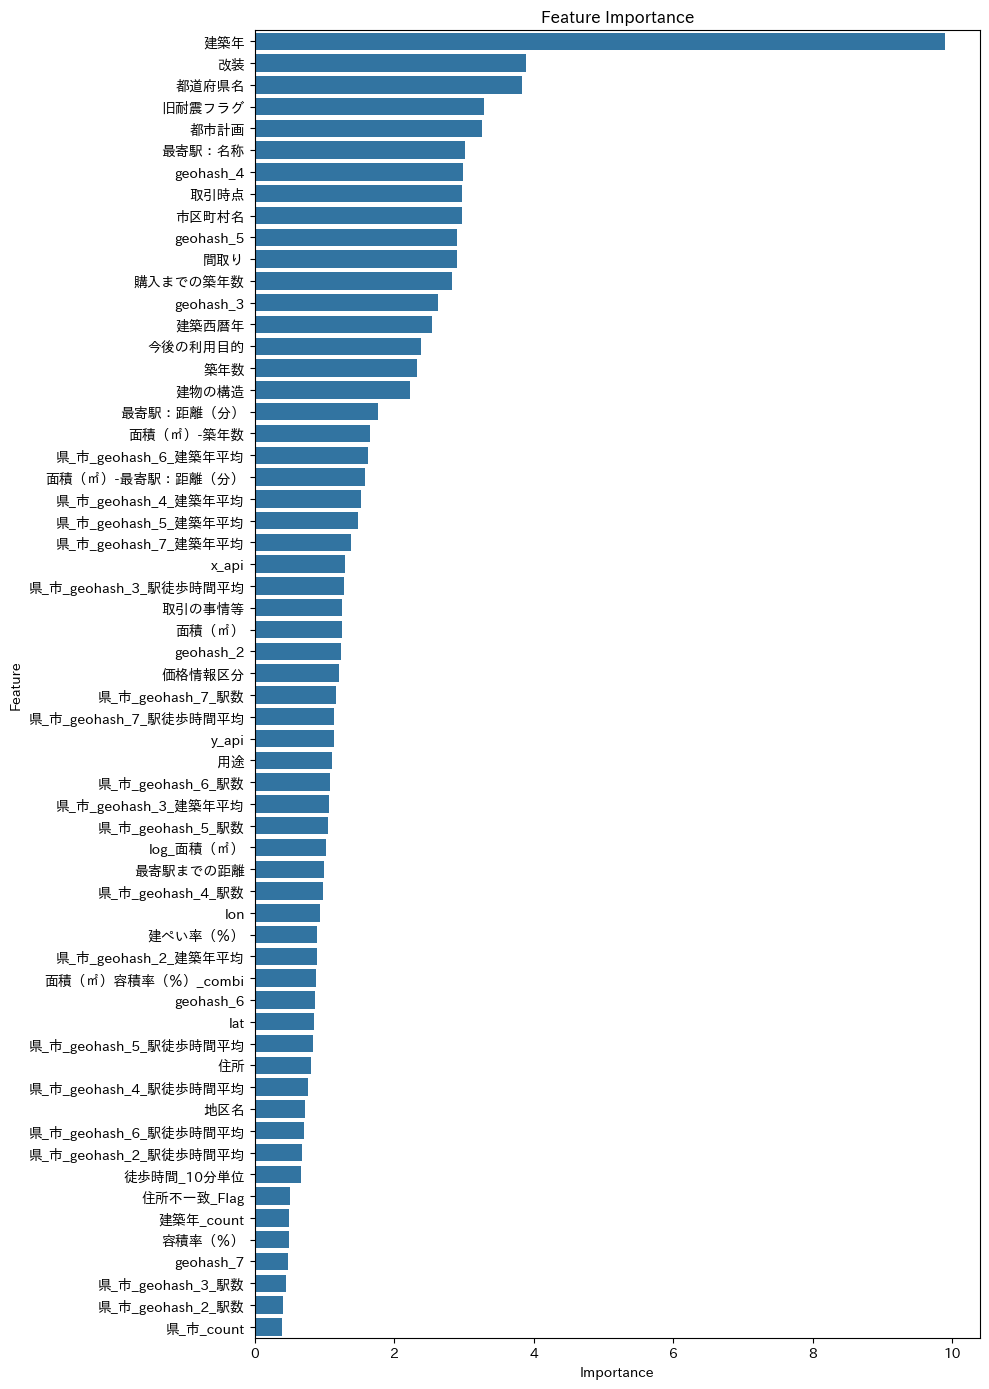

Fold-1


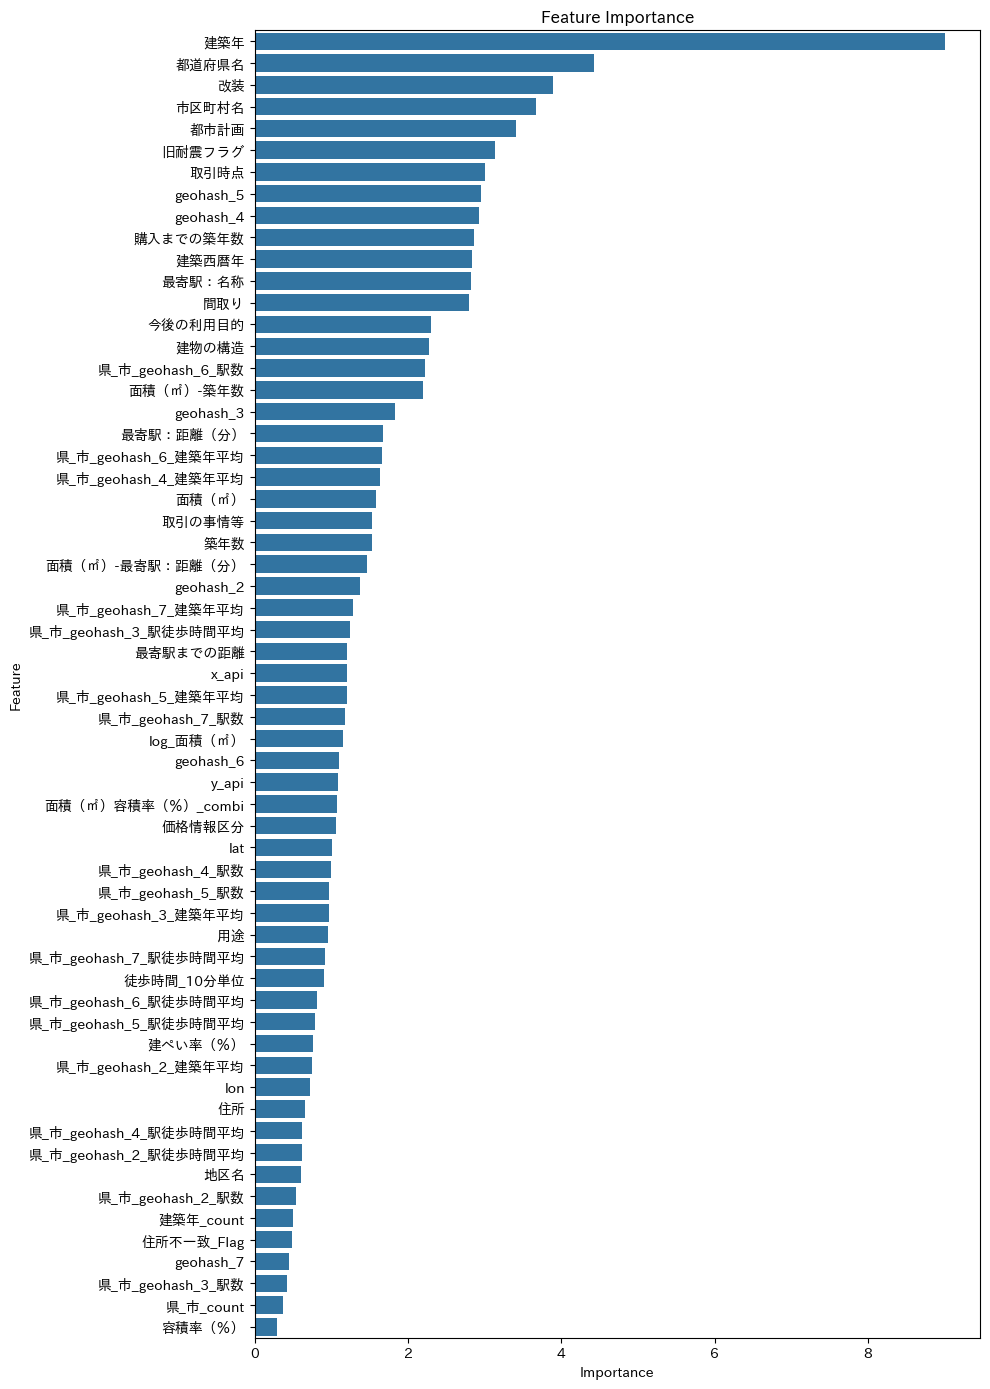

Fold-2


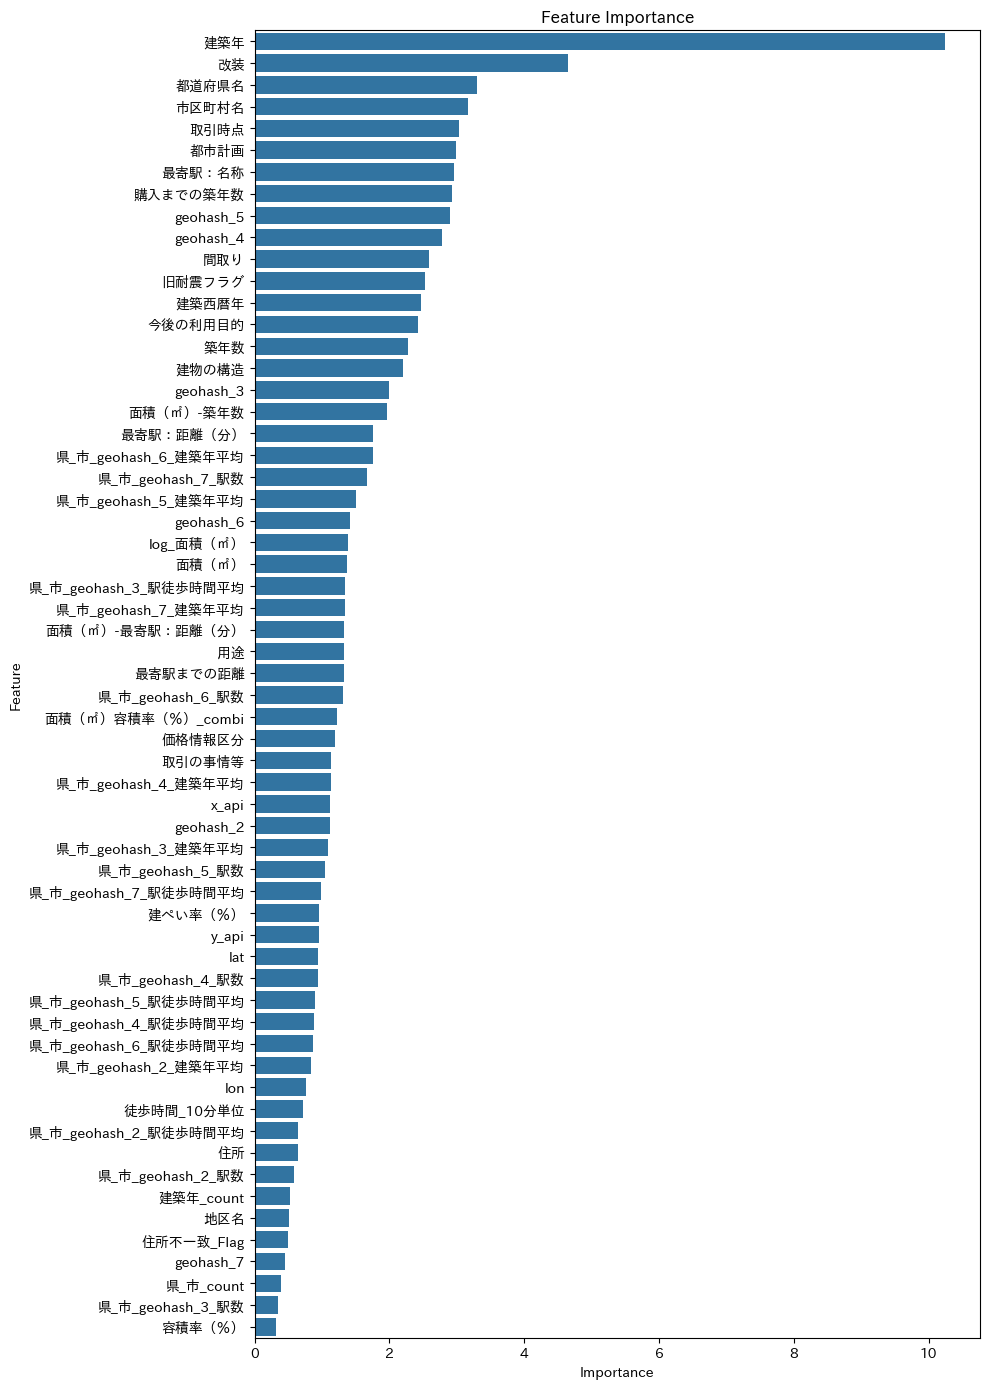

Fold-3


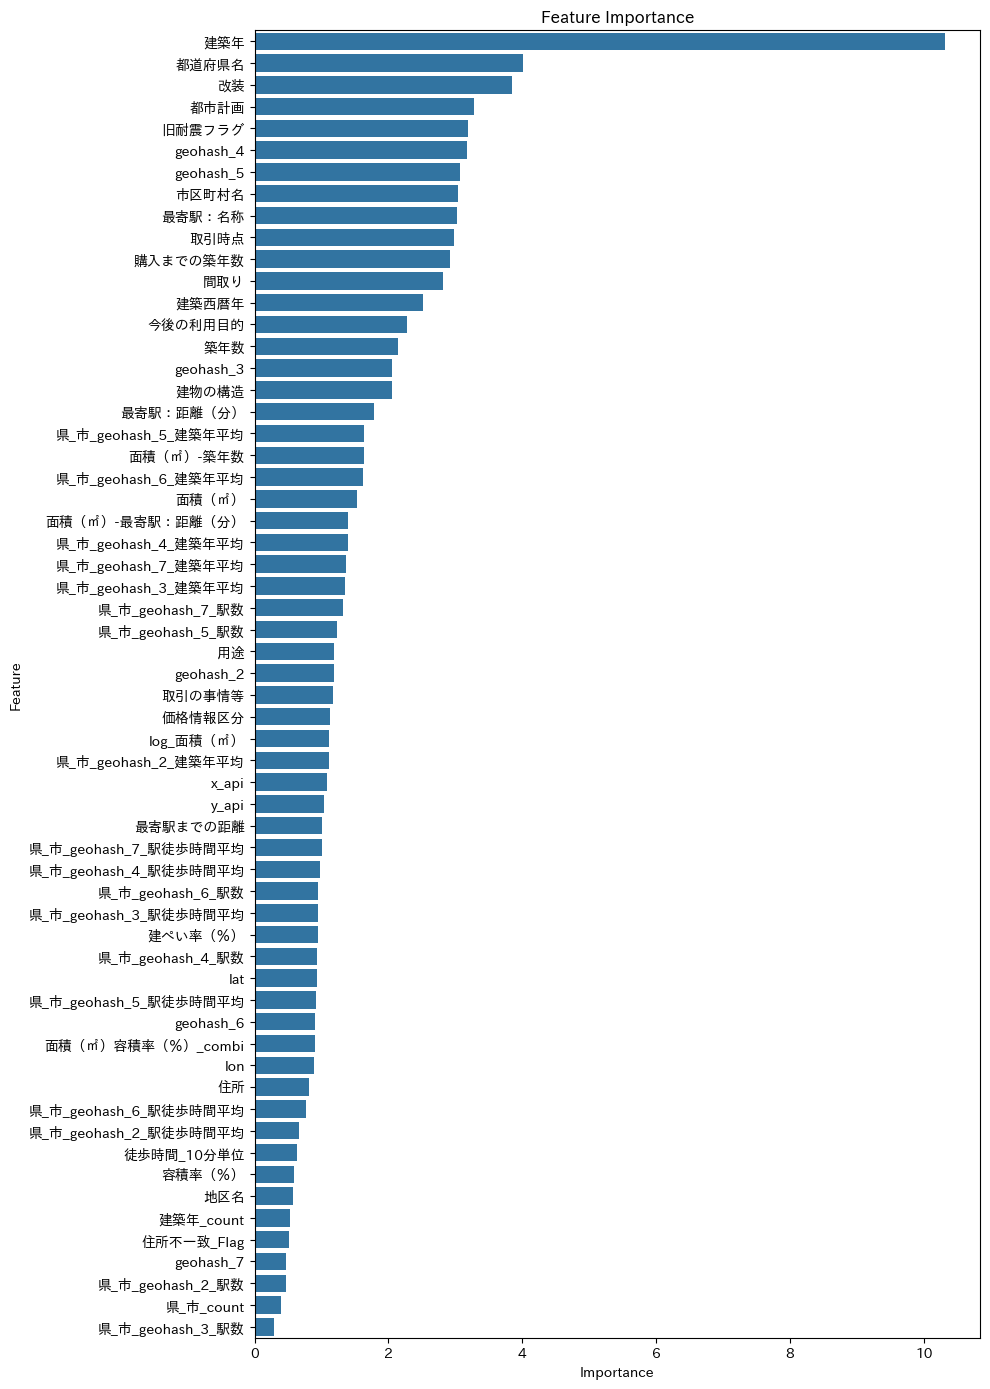

Fold-4


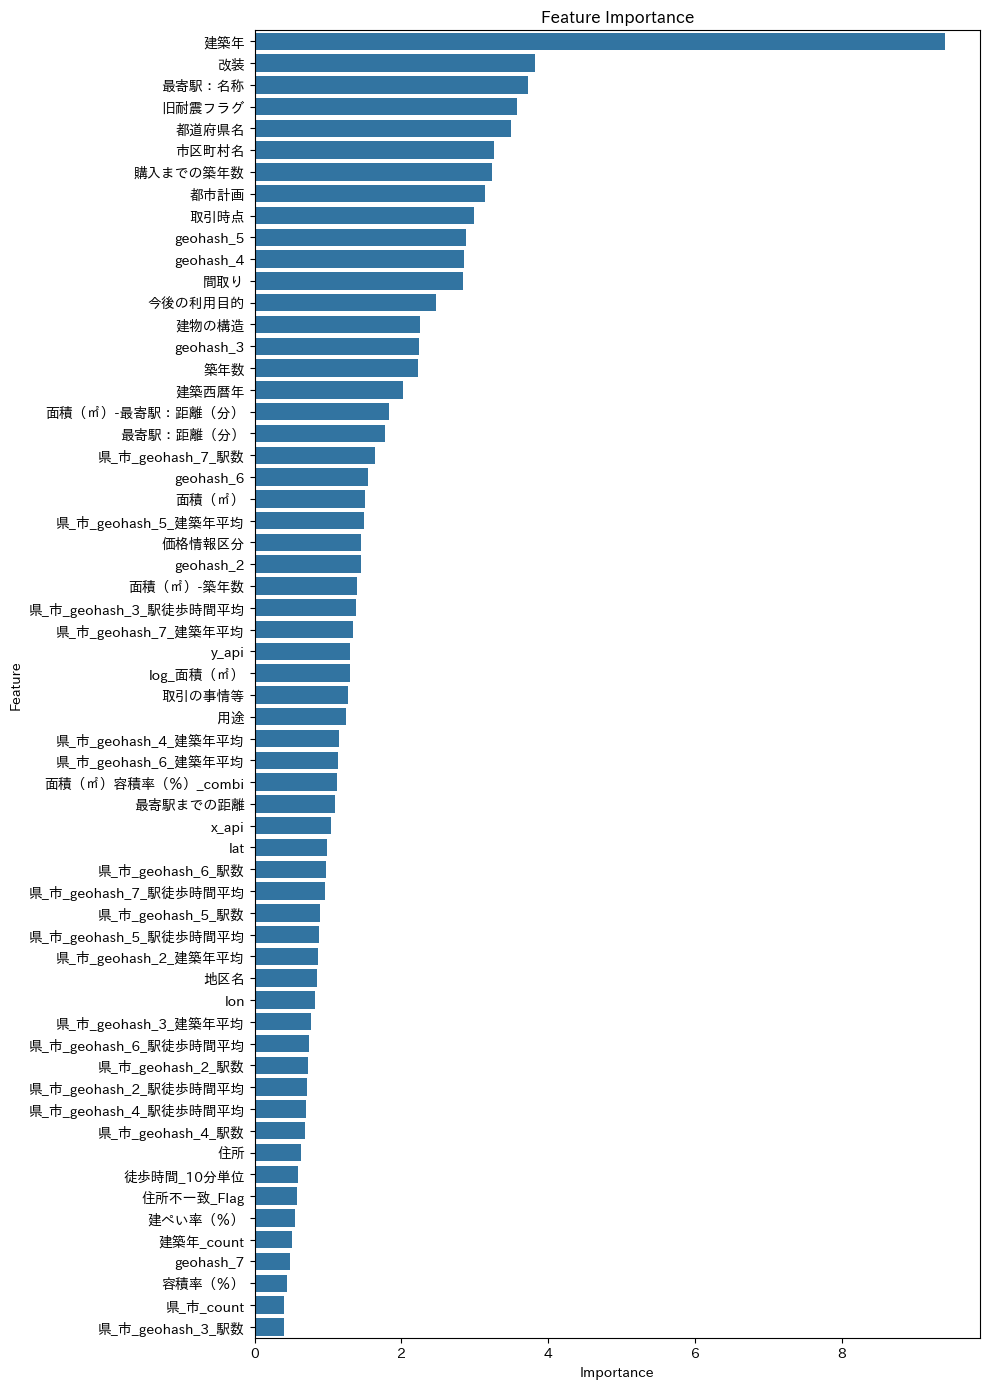

Fold-5


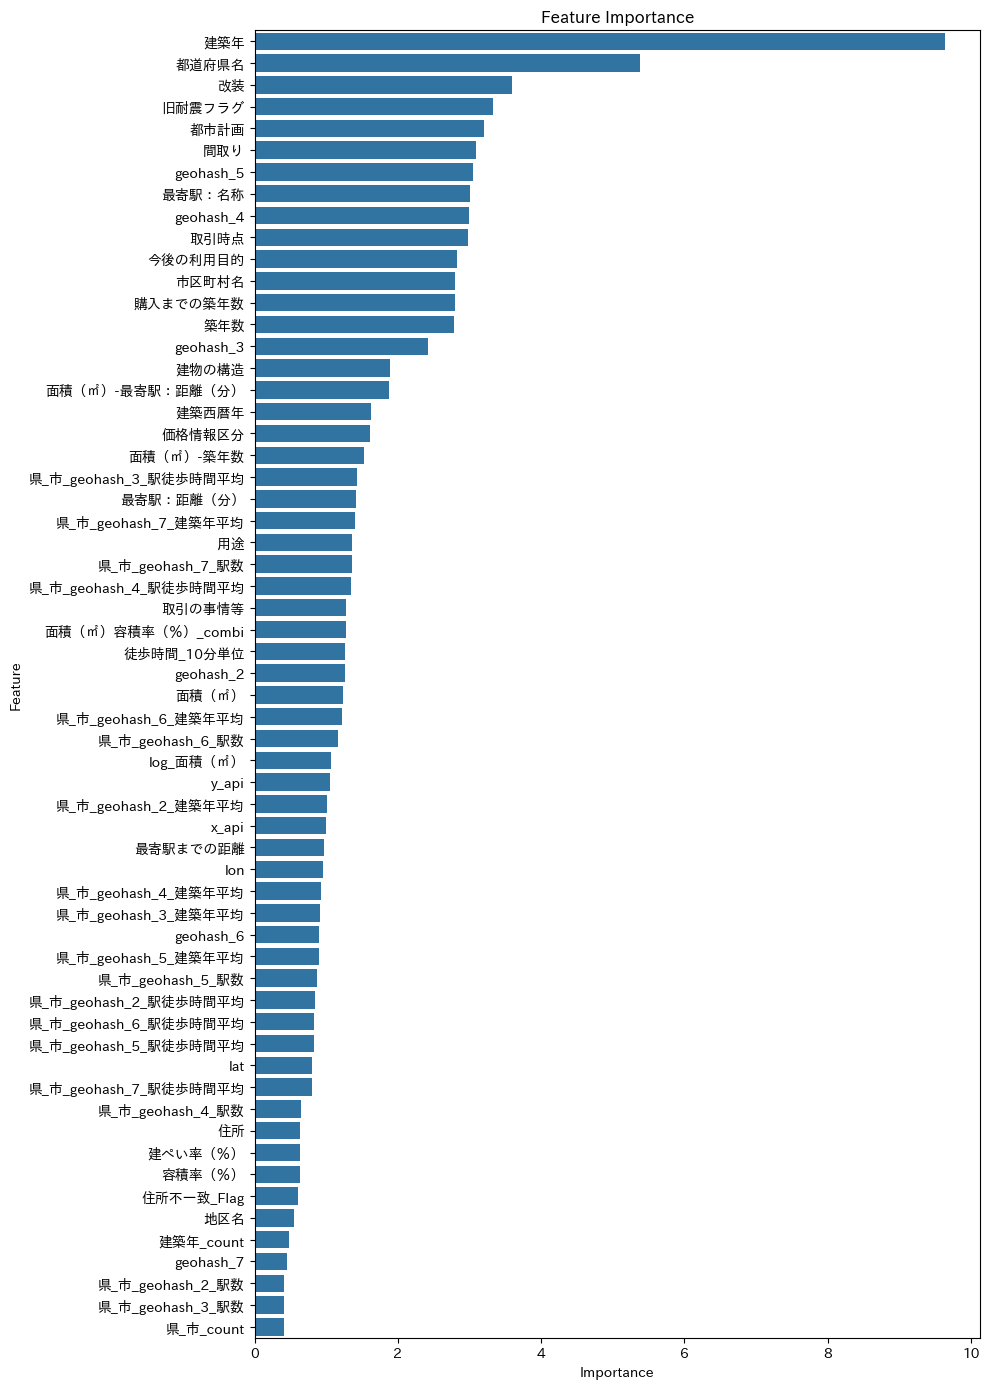

Fold-6


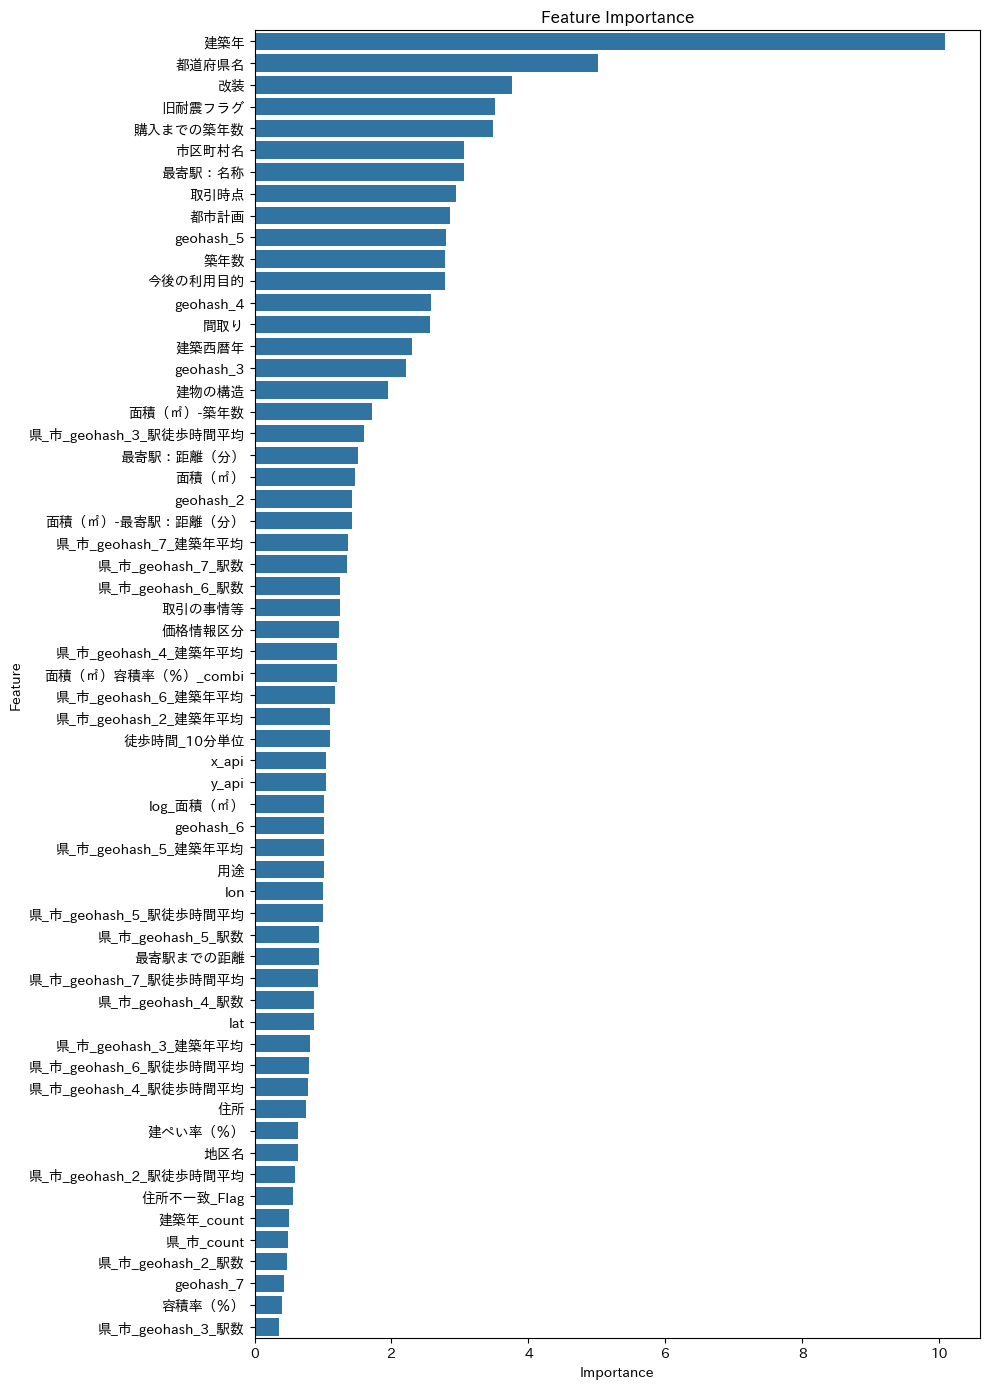

Fold-7


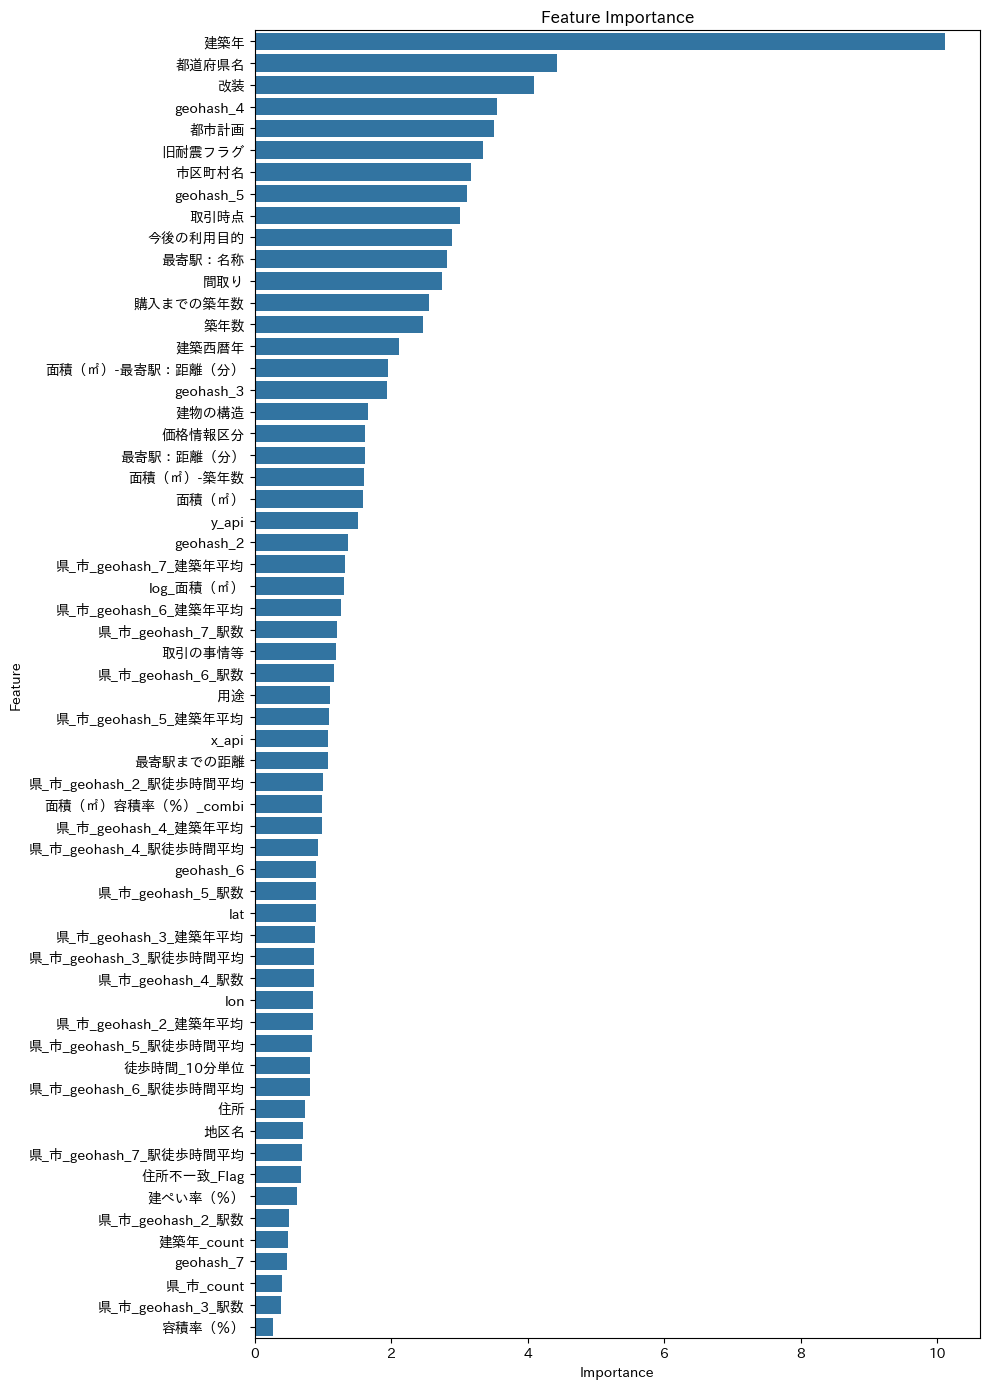

In [6]:
tree_class=TreeExecution(df_train,y_name=PRICE_PER_AREA_LOG,cat_cols=cat_cols)
#model_lgbm=tree_class.lightgbm_simple()
fitted_models_cat,mae_score,oof_df=tree_class.catboost()

In [7]:
oof_df.to_csv("/content/drive/MyDrive/yuto/project_directory/data/cv_predictions/sub_oof_cat_lq_cv.csv")
oof_df

,target,pred_cat
ID,,
1046933,5.243038,5.315171
1079053,5.124939,5.070996
1170588,4.867762,5.106156
1001637,5.484674,5.506614
1014790,5.260601,5.263428
...,...,...
47001427,5.342423,5.361636
47035975,5.726999,5.720287
47003811,5.528274,5.606375


In [8]:
model_cat=VotingModel(fitted_models_cat,cat_cols)
#model_lgbm = VotingModel(fitted_models_lgbm,cat_cols)
#model_xg=VotingModel(fitted_models_xg,cat_cols)
y_pred_cat=pd.Series(model_cat.predict_cat(df_test.drop(f"{PRICE_PER_AREA_LOG}",axis=1)),index=df_test.index)
#y_pred_lgbm=pd.Series(model_lgbm.predict_lgbm(df_test.drop(f"{PRICE_PER_AREA_LOG}",axis=1)),index=df_test.index)
#y_pred_xg=pd.Series(model_xg.predict_xg(df_test_tree.drop("取引価格（総額）_log",axis=1)),index=df_test_tree.index)


y_pred=y_pred_cat
# 単位面積あたりの取引価格の対数から10のべき乗を取る
price_per_area = 10**y_pred
# その値に面積を掛けて、取引価格（総額）を計算
predicted_price_total = price_per_area * df_test["面積（㎡）"]
# 取引価格（総額）の対数を計算
y_pred= np.log10(predicted_price_total)
#y_pred=y_pred.rename(columns={"面積（㎡）":"取引価格（総額）_log"})
# Seriesの名前を変更
y_pred.name = "取引価格（総額）_log"

#y_pred=y_pred_cat
#y_pred=y_pred_lgbm
# y_predをデータフレームに変換
df_pred = pd.DataFrame(y_pred, columns=["取引価格（総額）_log"])
#print(df_pred)
#print("--------------------------------------------------------------------------------")
# インデックスをリセットし、カラム名を'ID'に変更
#df_pred.reset_index(inplace=True)
#print(df_pred)
#print("--------------------------------------------------------------------------------")
#df_pred.rename(columns={'index': 'ID'}, inplace=True)
#print(df_pred)
#print("--------------------------------------------------------------------------------")

# 結果を表示
print(df_pred)

now_str=submisson_datetime()
df_pred.to_csv("/content/drive/MyDrive/yuto/project_directory/data/intermediate_results/one_model_predictions/sub_test_cat_lq_cv.csv")


          取引価格（総額）_log
ID                    
1000107       6.682117
1000109       7.299135
1000112       6.572996
1000114       6.439441
1000117       7.393857
...                ...
47036620      7.544762
47037115      7.500357
47037850      7.309144
47037855      7.553768
47037856      7.539944

[54402 rows x 1 columns]


In [9]:
df_sub=pd.read_csv("/content/drive/MyDrive/yuto/project_directory/data/final_predictions/v1test_cat_cv20240919_111048.csv")
print(df_sub)

             ID  取引価格（総額）_log
0       1000107      6.675571
1       1000109      7.296850
2       1000112      6.564507
3       1000114      6.433753
4       1000117      7.395544
...         ...           ...
54397  47036620      7.543099
54398  47037115      7.499714
54399  47037850      7.315738
54400  47037855      7.550711
54401  47037856      7.544750

[54402 rows x 2 columns]
